In [ ]:
!wget http://mrl.cs.vsb.cz/data/eyedataset/mrlEyes_2018_01.zip

--2021-10-01 09:38:30--  http://mrl.cs.vsb.cz/data/eyedataset/mrlEyes_2018_01.zip
Resolving mrl.cs.vsb.cz (mrl.cs.vsb.cz)... 158.196.141.22
Connecting to mrl.cs.vsb.cz (mrl.cs.vsb.cz)|158.196.141.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341866898 (326M) [application/zip]
Saving to: ‘mrlEyes_2018_01.zip’

mrlEyes_2018_01.zip 100%[===================>] 326.03M  7.12MB/s    in 46s     

2021-10-01 09:39:19 (7.15 MB/s) - ‘mrlEyes_2018_01.zip’ saved [341866898/341866898]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip=zipfile.ZipFile('drive/MyDrive/MRLeyes.zip')
zip.extractall()
zip.close()

In [ ]:
import random
import cv2 as cv
from google.colab.patches import cv2_imshow

15
mrlEyes_2018_01/s00015/s00015_000015_0_0_0_0_0_015.png


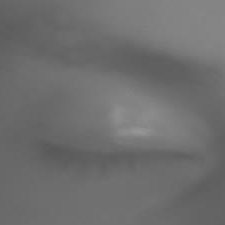

In [ ]:


num=random.randint(1,37)
print(num)
num=str(num)
dir='mrlEyes_2018_01'+'/'+'s000'+num+'/'+'s000'+num+'_0000'+num+'_0_0_0_0_0_0'+num+'.png'
print(dir)
img=cv.imread('/content/mrlEyes_2018_01/s0031/s0031_00035_1_0_0_0_1_02.png')  
cv2_imshow(img)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D

In [ ]:
train=image_dataset_from_directory('MRLeyes',
                                   label_mode='binary',
                                   image_size=(224,224),
                                   validation_split=0.2, 
                                   seed=42,
                                   subset="training"
                                   )
test=image_dataset_from_directory('MRLeyes',
                                   label_mode='binary',
                                   image_size=(224,224),
                                   seed=42,
                                   validation_split=0.2, 
                                   subset="validation"
                                   )

Found 84898 files belonging to 2 classes.
Using 67919 files for training.
Found 84898 files belonging to 2 classes.
Using 16979 files for validation.


In [ ]:
train.class_names

['Close', 'Open']

In [ ]:
model_0=Sequential([
    Conv2D(16,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(),
    Conv2D(64,3,activation='relu'),
    MaxPool2D(),


    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

model_0.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

model_0.fit(train,
            epochs=5,
            steps_per_epoch=len(train),
            validation_data=test,
            validation_steps=len(test))

model_0.save('drowsiness.h5')

Epoch 1/5
2123/2123 [==============================] - 152s 71ms/step - loss: 0.2267 - accuracy: 0.9195 - val_loss: 0.1281 - val_accuracy: 0.9566
Epoch 2/5
2123/2123 [==============================] - 151s 71ms/step - loss: 0.1096 - accuracy: 0.9608 - val_loss: 0.1431 - val_accuracy: 0.9502
Epoch 3/5
2123/2123 [==============================] - 151s 71ms/step - loss: 0.0821 - accuracy: 0.9718 - val_loss: 0.0767 - val_accuracy: 0.9747
Epoch 4/5
2123/2123 [==============================] - 152s 71ms/step - loss: 0.0621 - accuracy: 0.9786 - val_loss: 0.0646 - val_accuracy: 0.9799
Epoch 5/5
2123/2123 [==============================] - 152s 71ms/step - loss: 0.0509 - accuracy: 0.9825 - val_loss: 0.0712 - val_accuracy: 0.9797


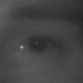

tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
[[0.9999995]]


In [ ]:
import cv2 as cv
dims=224
from google.colab.patches import cv2_imshow
img=cv.imread('/content/MRLeyes/Open/s0001_01886_0_0_1_0_0_01.png')
resized_image = cv.resize(img,(dims,dims),interpolation=cv.INTER_AREA)
  #resized_image=resized_image/resized_image.max()
  #resized_image=tf.cast(tf.constant(resized_image),dtype=tf.float32) 
resized_image=tf.expand_dims(resized_image,axis=0)
d=model_0.predict(resized_image)
cv2_imshow(img)
print(tf.round(d))
print(d)